In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

06/06/2018 14:40:25 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
06/06/2018 14:40:26 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
06/06/2018 14:40:28 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


In [6]:
dtfa.normalize_activations()

[10.872537612915039, 9.790372848510742, 8.538802146911621]

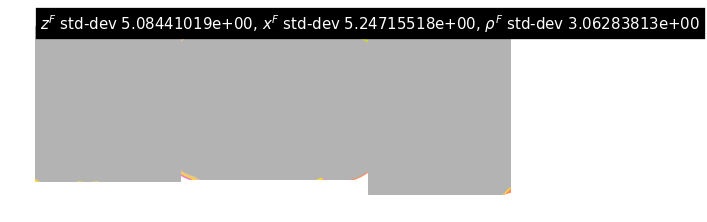

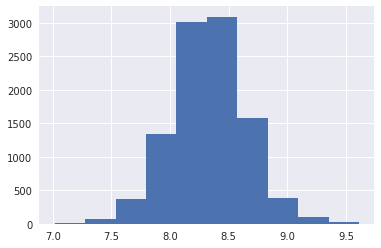

(<nilearn.plotting.displays.OrthoProjector at 0x7f0ce52ab080>, 
 ( 0 ,.,.) = 
  -5.4955e+01 -5.5173e+01  4.5223e+01
   3.4979e+00  1.0094e+01  4.3082e+00
  -3.3898e+01 -2.4766e+01 -8.5628e+00
                  ⋮                  
   1.0984e+01 -4.1166e+01 -3.2290e+01
  -1.0160e+01 -7.2674e+01 -8.0012e+00
  -2.2031e+01  1.1080e+01  2.7530e+01
 
 ( 1 ,.,.) = 
  -5.5375e+01 -5.5734e+01  4.5498e+01
   4.2429e+00  1.0722e+01  4.5955e+00
  -3.4612e+01 -2.5126e+01 -8.2755e+00
                  ⋮                  
   1.1623e+01 -4.1224e+01 -3.2195e+01
  -9.4249e+00 -7.3441e+01 -8.3105e+00
  -2.1516e+01  1.1584e+01  2.8227e+01
 
 ( 2 ,.,.) = 
  -5.5479e+01 -5.5714e+01  4.5541e+01
   4.4372e+00  1.0939e+01  4.8109e+00
  -3.4715e+01 -2.5259e+01 -8.2305e+00
                  ⋮                  
   1.1724e+01 -4.1248e+01 -3.2078e+01
  -9.2220e+00 -7.3745e+01 -8.3850e+00
  -2.1466e+01  1.1804e+01  2.8536e+01
 ... 
 
 (97 ,.,.) = 
  -5.4918e+01 -5.6112e+01  4.5083e+01
   4.1175e+00  1.0580e+01  4.060

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=500, learning_rate=1e-2, log_level=logging.INFO, num_particles=2,
                    batch_size=100, use_cuda=True, blocks_batch_size=8, patience=20)

06/06/2018 14:42:22 [Epoch 1] (1253ms) Posterior free-energy 6.99462861e+10
06/06/2018 14:42:23 [Epoch 2] (1051ms) Posterior free-energy 4.68833157e+10
06/06/2018 14:42:24 [Epoch 3] (1037ms) Posterior free-energy 3.33284516e+10
06/06/2018 14:42:25 [Epoch 4] (1047ms) Posterior free-energy 2.59750298e+10
06/06/2018 14:42:26 [Epoch 5] (1049ms) Posterior free-energy 1.01556163e+10
06/06/2018 14:42:27 [Epoch 6] (1044ms) Posterior free-energy 7.92798874e+09
06/06/2018 14:42:28 [Epoch 7] (1050ms) Posterior free-energy 6.05919846e+09
06/06/2018 14:42:29 [Epoch 8] (1054ms) Posterior free-energy 6.27107021e+09
06/06/2018 14:42:30 [Epoch 9] (1026ms) Posterior free-energy 4.50427136e+09
06/06/2018 14:42:31 [Epoch 10] (1033ms) Posterior free-energy 4.21766502e+09
06/06/2018 14:42:32 [Epoch 11] (1038ms) Posterior free-energy 4.27363891e+09
06/06/2018 14:42:33 [Epoch 12] (1057ms) Posterior free-energy 4.21064909e+09
06/06/2018 14:42:34 [Epoch 13] (1035ms) Posterior free-energy 5.31768269e+09
06/06/20

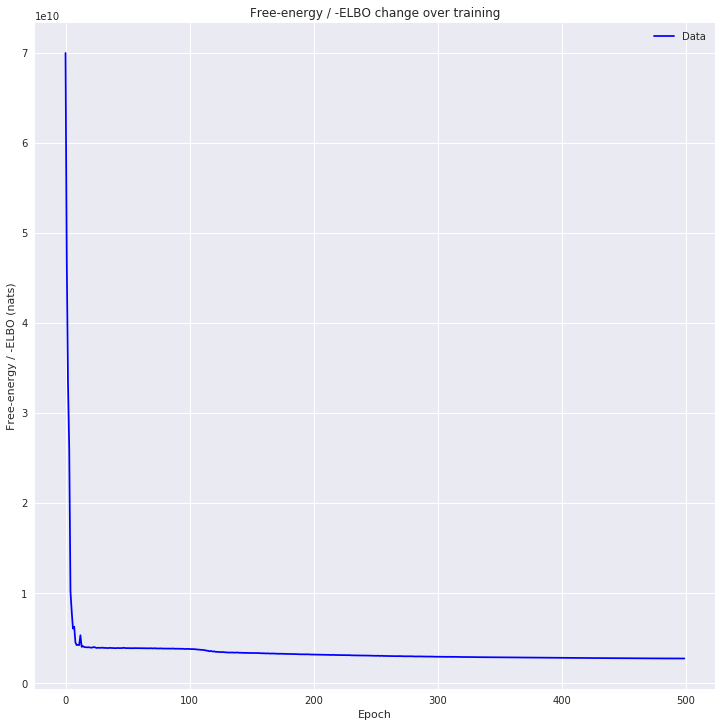

In [9]:
utils.plot_losses(losses)

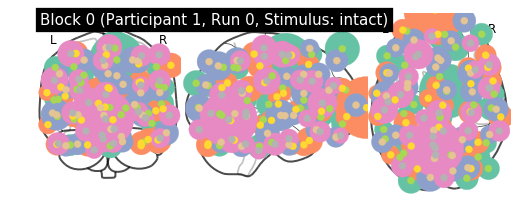

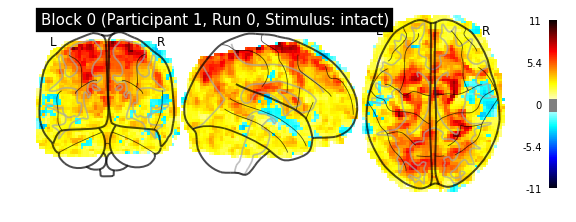

06/06/2018 14:51:29 Reconstruction Error (Frobenius Norm): 4.31171875e+03 out of 5.08479639e+03


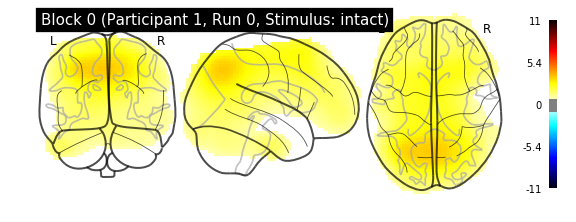

{'weights': 
 5.0668e-01  1.5115e-01  1.0177e-02  ...  -7.9782e-02  1.0727e+00  3.4533e-01
 3.6552e-01 -5.3599e-03  8.7436e-05  ...   1.2040e-01  6.4383e-02  5.5329e-01
 4.3101e-01 -8.5403e-02 -1.4571e-01  ...   4.1627e-03 -2.9664e-01  5.5564e-01
                ...                   ⋱                   ...                
 2.6665e-01  6.6291e-03  1.3839e-01  ...  -2.1817e-01  3.5332e-01  5.1893e-02
 4.4137e-01  1.7896e-01 -8.9392e-02  ...   1.5251e-02 -1.3341e-01  4.5837e-02
 5.9294e-01 -1.8372e-01 -9.7213e-02  ...   7.0868e-02  1.1805e-01  1.7059e-01
[torch.FloatTensor of size 300x100]
, 'factors': 
 0.0041  0.0019  0.0024  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0469  0.0453  0.0424  ...   0.0956  0.0936  0.0917
 0.0012  0.0015  0.0017  ...   0.0000  0.0000  0.0000
[torch.FloatT

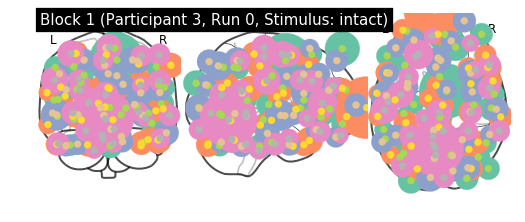

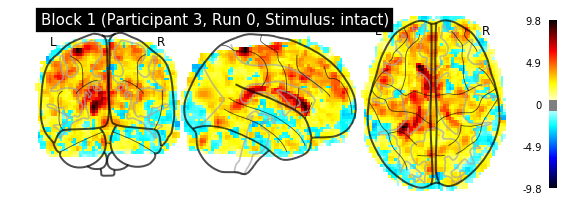

06/06/2018 14:51:55 Reconstruction Error (Frobenius Norm): 4.45601172e+03 out of 5.19534277e+03


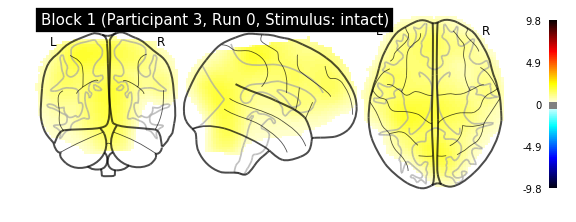

{'weights': 
-3.0970e-01  4.7744e-01 -1.2905e-02  ...   6.3802e-02  6.5185e-01  1.3645e-01
-3.2207e-01 -8.7875e-02 -5.3806e-02  ...   2.2460e-01 -2.3940e-01  2.1763e-01
-2.1293e-01  1.6049e-01 -1.3229e-01  ...   1.0119e-01 -1.9762e-01  3.3952e-02
                ...                   ⋱                   ...                
 1.0457e-01  2.0870e-02 -1.3161e-01  ...  -1.0294e-01  1.1641e+00 -4.5750e-01
 7.9042e-01 -2.5213e-01 -2.6975e-01  ...  -2.9449e-01  6.4149e-01 -5.3889e-01
 1.0223e+00  8.2975e-01 -1.5310e-01  ...  -3.6937e-01  5.1265e-01 -1.2089e+00
[torch.FloatTensor of size 300x100]
, 'factors': 
 0.0041  0.0019  0.0023  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0462  0.0446  0.0417  ...   0.0943  0.0923  0.0905
 0.0013  0.0016  0.0017  ...   0.0000  0.0000  0.0000
[torch.FloatT

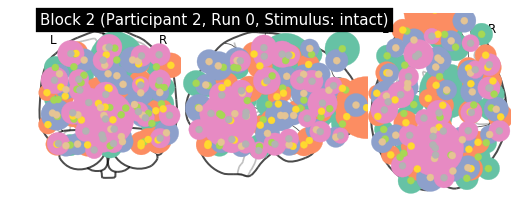

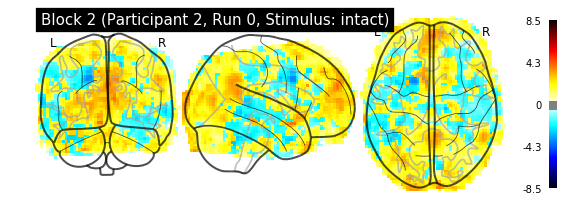

06/06/2018 14:52:22 Reconstruction Error (Frobenius Norm): 4.29254443e+03 out of 5.19534277e+03


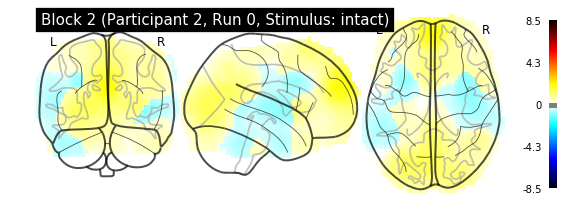

{'weights': 
-6.9467e-02  1.1013e+00 -7.6305e-02  ...   2.0350e-01  5.6758e-02 -1.1170e+00
-2.6779e-01  4.6529e-01 -1.4632e-01  ...  -1.8870e-01 -5.8308e-02 -2.6417e-01
-4.7593e-01  3.7074e-01  7.1531e-02  ...   6.9923e-02 -5.8557e-02  2.9031e-02
                ...                   ⋱                   ...                
 4.9592e-01  9.2470e-03  2.8752e-02  ...   8.0226e-02  1.0017e+00  6.5760e-02
 3.4582e-01 -3.3498e-02 -6.2055e-02  ...  -2.8159e-02  1.1018e+00 -1.3020e-01
 7.3244e-01  6.2527e-02 -6.5404e-02  ...  -1.3897e-01  4.4804e-01 -2.1038e-01
[torch.FloatTensor of size 300x100]
, 'factors': 
 0.0041  0.0019  0.0023  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0463  0.0446  0.0418  ...   0.0944  0.0924  0.0906
 0.0013  0.0016  0.0018  ...   0.0000  0.0000  0.0000
[torch.FloatT

In [10]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [11]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


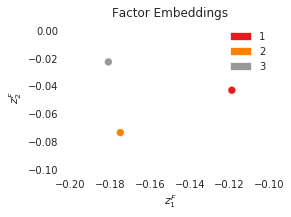

In [12]:
dtfa.scatter_factor_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


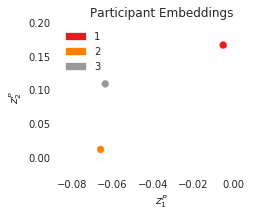

In [13]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


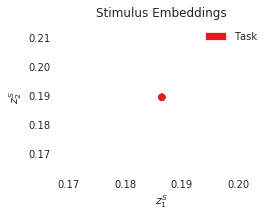

In [14]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

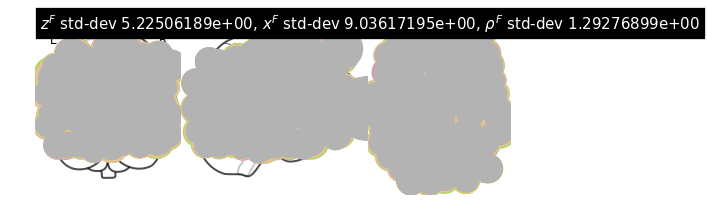

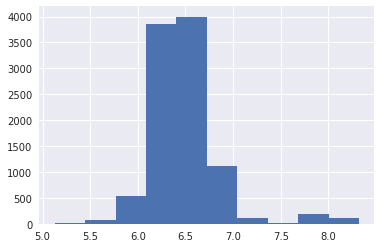

(<nilearn.plotting.displays.OrthoProjector at 0x7f0cccbf8828>, 
 ( 0 ,.,.) = 
  -55.6198 -53.7491  44.4236
    2.2040  12.3259   2.7108
  -35.6124 -25.6396 -10.3357
              ⋮             
    6.8241 -44.0443 -34.8368
   -4.5495 -64.9846  -9.8838
  -29.1778  12.4798  30.9413
 
 ( 1 ,.,.) = 
  -55.7932 -53.2265  44.4167
    1.5650  12.6298   2.3191
  -36.0121 -26.1831  -9.7675
              ⋮             
    5.6781 -44.5491 -35.6362
   -3.6024 -63.0291  -9.7947
  -30.4870  12.7028  31.5422
 
 ( 2 ,.,.) = 
  -55.9807 -53.3847  44.5383
    1.8092  12.6616   2.3152
  -35.9052 -26.0806  -9.6800
              ⋮             
    5.9591 -44.5442 -35.5760
   -3.7005 -63.4816  -9.9594
  -30.1131  12.5363  31.5445
 ... 
 
 (97 ,.,.) = 
  -55.7269 -53.7794  44.5613
    2.0348  12.4757   2.4616
  -35.7963 -25.8528 -10.3738
              ⋮             
    6.6105 -44.2323 -35.0440
   -3.9773 -64.4459  -9.8947
  -29.8911  12.5853  31.2575
 
 (98 ,.,.) = 
  -55.9252 -53.3462  44.5209
    1.6595 

In [15]:
dtfa.visualize_factor_embedding()